In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
%matplotlib inline

In [2]:
def compute_cost(X, y, beta):
    
    #X is the population X = x1, x2, x3... xn
    #X has the shape [beta, pop]
    #beta has this shape [b1, b2]
    #hb(pop) = profit predicted
    
    n    = len(X)
    sumt = 0
    
    hb   = (X * beta.T) - y   
    isso = np.multiply(hb,hb)
    sumt = np.sum(isso)  
    
    Jb = sumt/(2*n)
    return Jb
    

In [3]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    temp       = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost       = np.zeros(iters)
    n          = X.shape[0]
    sumt       = 0
    
    
    for i in range(iters):
        dif  = (X * theta.T) - y
        
        for j in range(parameters):
            mult = np.multiply(dif, X[:,j])
            sumt = np.sum(mult) 
            temp[0,j] = theta[0,j] - ((alpha/n) * sumt)

        theta = temp       
        cost[i] = compute_cost(X, y, theta)
    
    return theta, cost

# Data 2 with One Feature

In [4]:
data = pd.read_csv('home_data.txt', header=None, names=['id', 'date', 'price', 'bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'])
#data.head()

In [5]:
data = (data - data.mean()) / data.std()
#data.head()

Ploting Scatter of data

Text(0,0.5,'House Price')

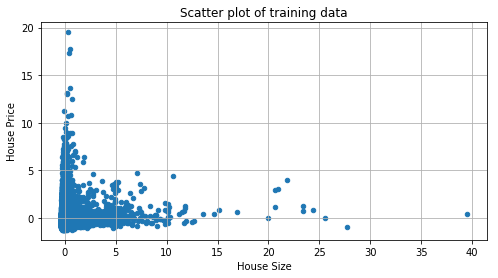

In [6]:
ax = data.plot(kind='scatter', x='sqft_lot', y='price', title='Scatter plot of training data', figsize=(8,4),grid=True);
ax.set_xlabel('House Size')
ax.set_ylabel('House Price')

 Variable Inicialization

In [7]:
data.insert(0, 'beta zero', 1)

In [8]:
train_data = data.sample(frac=0.6, random_state=200)
cols = train_data.shape[1]
X = train_data.iloc[:, [0,7]] #sqft_lot
y = train_data.iloc[:, cols-19:cols-18] #price

In [9]:
X.head()
#X.shape

,beta zero,sqft_lot
11860,1,-0.193792
12446,1,-0.180417
10556,1,-0.077907
4828,1,0.495263
3502,1,-0.285631


In [10]:
y.head()

,price
11860,-0.294416
12446,0.571769
10556,-0.272625
4828,-0.370684
3502,-0.411542


In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

In [12]:
compute_cost(X, y, beta)

0.508179991406031

Gradrient Descent

In [13]:
alpha = 0.01
iters = 1500

In [14]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[-0.00277799,  0.08107794]])

In [15]:
compute_cost(X, y, g)

0.5049013994998257

# Data 2 with Multiple Features

In [16]:
X2 = train_data.iloc[:, [0,5,6,7]] #sqft_lot
y2 = train_data.iloc[:, cols-19:cols-18] #price

In [17]:
X2.head()
#X2.shape

,beta zero,bathrooms,sqft_living,sqft_lot
11860,1,-0.149004,-0.228539,-0.193792
12446,1,0.824816,1.186903,-0.180417
10556,1,-0.473610,-0.086995,-0.077907
4828,1,1.149422,2.155937,0.495263
3502,1,-1.447430,-1.339117,-0.285631


In [18]:
y2.head()

,price
11860,-0.294416
12446,0.571769
10556,-0.272625
4828,-0.370684
3502,-0.411542


In [19]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
beta = np.matrix(np.array([0,0,0,0]))

In [20]:
compute_cost(X2, y2, beta)

0.508179991406031

In [21]:
g, cost = gradient_descent(X2, y2, beta, alpha, iters)
g

matrix([[-7.04659816e-04, -8.78355674e-05,  7.17841984e-01,
         -2.79245870e-02]])

In [22]:
compute_cost(X2, y2, g)

0.2539417436750657